In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Import Matplotlib
import seaborn as sns  # Import Seaborn

In [39]:
gossipcop_fake_df = pd.read_csv('dataset/gossipcop_fake.csv')
gossipcop_real_df = pd.read_csv('dataset/gossipcop_real.csv')

politifact_fake_df = pd.read_csv('dataset/politifact_fake.csv')
politifact_real_df = pd.read_csv('dataset/politifact_real.csv')

In [40]:
fake_df = pd.concat([gossipcop_fake_df, politifact_fake_df])
true_df = pd.concat([gossipcop_real_df, politifact_real_df])

fake_df.index = [x for x in range(len(gossipcop_fake_df) + len(politifact_fake_df))]
true_df.index = [x for x in range(len(gossipcop_real_df) + len(politifact_real_df))]

In [41]:
# add labels to both df
true_df['true'] = 1
fake_df['true'] = 0

# concat
df = pd.concat([true_df, fake_df])
display(df)


,id,news_url,title,tweet_ids,true
0,gossipcop-882573,https://www.brides.com/story/teen-mom-jenelle-...,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,912371411146149888\t912371528343408641\t912372...,1
1,gossipcop-875924,https://www.dailymail.co.uk/tvshowbiz/article-...,Kylie Jenner refusing to discuss Tyga on Life ...,901989917546426369\t901989992074969089\t901990...,1
2,gossipcop-894416,https://en.wikipedia.org/wiki/Quinn_Perkins,Quinn Perkins,931263637246881792\t931265332022579201\t931265...,1
3,gossipcop-857248,https://www.refinery29.com/en-us/2018/03/19192...,I Tried Kim Kardashian's Butt Workout & Am For...,868114761723936769\t868122567910936576\t868128...,1
4,gossipcop-884684,https://www.cnn.com/2017/10/04/entertainment/c...,Celine Dion donates concert proceeds to Vegas ...,915528047004209152\t915529285171122176\t915530...,1
...,...,...,...,...,...
5750,politifact14944,http://thehill.com/homenews/senate/369928-who-...,Who is affected by the government shutdown?,954602090462146560\t954602093171609600\t954650...,0
5751,politifact14071,https://web.archive.org/web/20170322070001/htt...,Lindsey Graham Threatens To Convert To Democra...,740351669834244096\t740391312277573632\t740474...,0
5752,politifact13577,http://archive.is/DQqCx,ELECTORAL COLLEGE ELECTOR COMMITS SUICIDE TO A...,810939651900907520\t814738996706164737\t814917...,0
5753,politifact13560,politicono.com/palin-calls-boycott-mall-americ...,Sarah Palin Calls To Boycott Mall Of America B...,805216591424212993\t805222830023540736\t805223...,0


In [42]:
# inspect length of news
titles = [text for text in df.title]

max_len = 0
titles_len = []
for title in titles:
    titles_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)
    
print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('Mean length of the titles:', np.mean(titles_len))

Number of titles: 23196
Max length of the titles: 53
Mean length of the titles: 11.161191584755992


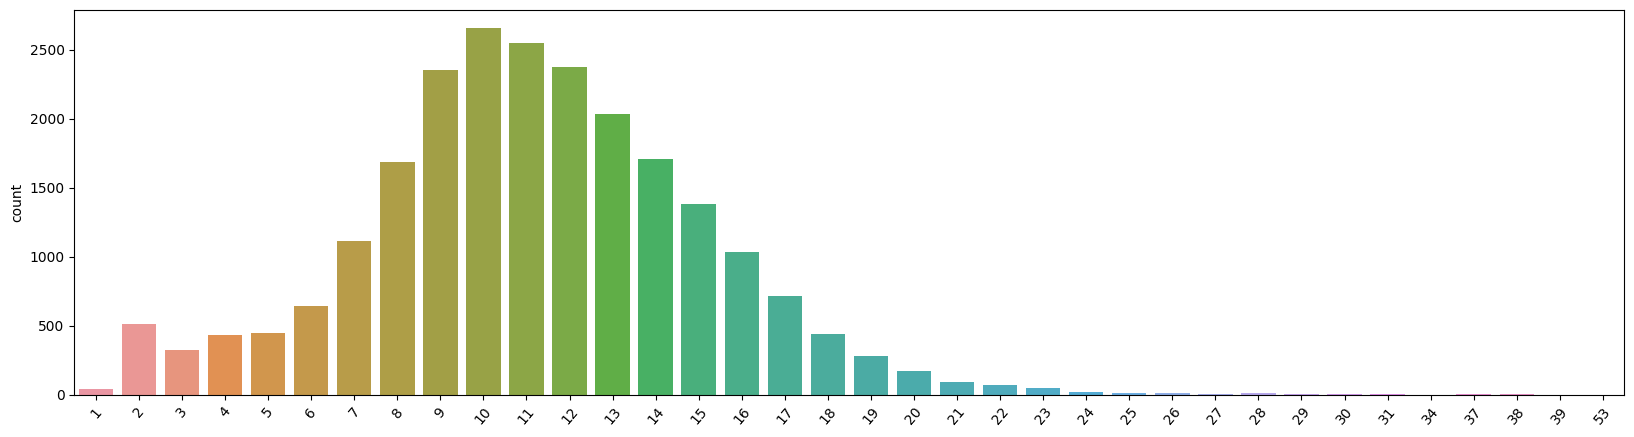

In [43]:
plt.figure(figsize=(20,5))
g = sns.countplot(x=titles_len)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.show()

In [44]:
# purify and shuffle the DataFrame
from sklearn.utils import shuffle

# purify
df = df.iloc[:, [2,-1]]

# shuffle
df = shuffle(df).reset_index(drop=True)

display(df)

,title,true
0,Is there a Britney Spears Sex Tape?,0
1,Ed Sheeran says he broke his arm in bike accident,1
2,9 Biggest Jaw-Droppers From the 2017 MTV VMAs,1
3,Exclusive: Céline Dion on the Met Gala and Her...,1
4,"‘A Star Is Born’: Bradley Cooper, Lady Gaga in...",0
...,...,...
23191,Scarlett Johansson Sports a New Large Back Tat...,1
23192,Fact-Checking Feud: Bette and Joan Episode 6: ...,1
23193,Solange Recalls Incubus Singer Crush and Gives...,1
23194,Survivor’s Jenna Morasco Arrested After Allege...,1


In [45]:
train_df = df.sample(frac=0.8)
val_df = df.drop(train_df.index)

# reset index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

print('trainset size:', train_df.shape)
print('valset size:', val_df.shape)

trainset size: (18557, 2)
valset size: (4639, 2)


In [46]:
# check for null titles
train_df['title'].isnull().sum()
val_df['title'].isnull().sum()

0

In [47]:
# DataFrame to csv
train_df.to_csv('train.tsv', sep='\t', index=False)
val_df.to_csv('val.tsv', sep='\t', index=False)

In [48]:
train_df = pd.read_csv('train.tsv', sep='\t')
val_df = pd.read_csv('val.tsv', sep='\t')



In [49]:

# no null values in dataset
train_df['title'].isnull().sum()

0

In [50]:
val_df['title'].isnull().sum()

0

In [51]:
print('Train real news:', train_df[train_df['true']==1].shape[0])
print('Train fake news:', train_df[train_df['true']==0].shape[0])

print('Val real news:', val_df[val_df['true']==1].shape[0])
print('Val fake news:', val_df[val_df['true']==0].shape[0])

Train real news: 13981
Train fake news: 4576
Val real news: 3460
Val fake news: 1179


In [52]:
#sample real news
train_df[train_df['true']==1].sample(n=1)['title'].iloc[0]

"10 Celebrities' Instagram Stories You Should Watch"

In [53]:
#sample fake news
train_df[train_df['true']==0].sample(n=1)['title'].iloc[0]

'5 Tom Cruise Dating Rumors You Should Stop Believing Now'

In [54]:
# word count in news
word_counts_train = train_df['title'].apply(lambda x: len(x.split()))
word_counts_train.describe()

count    18557.000000
mean        11.153850
std          3.994525
min          1.000000
25%          9.000000
50%         11.000000
75%         14.000000
max         53.000000
Name: title, dtype: float64

In [55]:
word_counts_val = val_df['title'].apply(lambda x: len(x.split()))
word_counts_val.describe()

count    4639.000000
mean       11.190558
std         3.909927
min         1.000000
25%         9.000000
50%        11.000000
75%        14.000000
max        31.000000
Name: title, dtype: float64

In [56]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ishraq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ishraq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ishraq\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [57]:
stop_words = stopwords.words('english')
stop_words.remove('not')
lemmatizer = WordNetLemmatizer()

In [58]:
def data_preprocessing(review):
    
    # data cleaning
    review = re.sub(re.compile('<.*?>'), '', review) # remove html tags
    review = re.sub('[^A-Za-z0-9]+', ' ', review) # taking only words
    
    # lowercase
    review = review.lower()
    
    # tokenization
    tokens = nltk.word_tokenize(review)
    
    # stop word removal
    review = [word for word in tokens if word not in stop_words]
    
    # lemmatization
    review = [lemmatizer.lemmatize(word) for word in review]
    
    # join words in preprocessed review
    review = ' '.join(review)
    
    return review

In [59]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ishraq\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [60]:
train_df['preprocessed_title'] = train_df['title'].apply(lambda review: data_preprocessing(review))
train_df

,title,true,preprocessed_title
0,Disneyland’s Pirates Of The Caribbean Ride Mak...,1,disneyland pirate caribbean ride make change c...
1,Miley Cyrus and Jimmy Fallon Go Undercover as ...,1,miley cyrus jimmy fallon go undercover subway ...
2,Channing Tatum Pens Powerful Letter for Daught...,1,channing tatum pen powerful letter daughter ev...
3,24 Investment Pieces For Fall 2018 That Our Ed...,1,24 investment piece fall 2018 editor eye
4,‘WAGS Miami’ Stars Ashley Nicole Roberts and P...,1,wag miami star ashley nicole robert philip whe...
...,...,...,...
18552,Quentin Tarantino Breaks Silence After Uma Thu...,1,quentin tarantino break silence uma thurman sh...
18553,Jesse Williams (actor),1,jesse williams actor
18554,"Richard Simmons ordered to pay $130,000 after ...",1,richard simmons ordered pay 130 000 transgende...
18555,WAGS' Dominique Penn Dives Into the Deep End D...,1,wag dominique penn dive deep end swim lesson d...


In [61]:
val_df['preprocessed_title'] = val_df['title'].apply(lambda review: data_preprocessing(review))
val_df


,title,true,preprocessed_title
0,See the Shocking Moment Rick Fox Finds Out Som...,1,see shocking moment rick fox find someone clos...
1,Here's how Jon Snow and Daenerys Targaryen are...,1,jon snow daenerys targaryen related game throne
2,I Tried Kim Kardashian's Butt Workout & Am For...,1,tried kim kardashian butt workout forever changed
3,Taylor Swift and Joe Alwyn Are ‘’Exclusive’’ B...,1,taylor swift joe alwyn exclusive besties selen...
4,Bindi Irwin Does NOT Believe Chandler Powell I...,0,bindi irwin not believe chandler powell late d...
...,...,...,...
4634,Khloe Kardashian Did NOT Give Birth Over Easte...,0,khloe kardashian not give birth easter despite...
4635,Meghan Markle confirms her father will not att...,1,meghan markle confirms father not attend royal...
4636,Chad Michael Murray Shares First Image of Baby...,1,chad michael murray share first image baby dau...
4637,'Timeless' Star Matt Lanter and His Wife Are H...,1,timeless star matt lanter wife baby girl


In [62]:
print('FakeNewsNet length:', len(val_df))

FakeNewsNet length: 4639


In [63]:
X_train = train_df['preprocessed_title']
X_val = val_df['preprocessed_title']

y_train = train_df['true']
y_val = val_df['true']

print('Train data:', X_train.shape, y_train.shape)
print('Test data:', X_val.shape, y_val.shape)

Train data: (18557,) (18557,)
Test data: (4639,) (4639,)


In [64]:
# vectorizing text data: TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10)

X_train_news_tfidf = vectorizer.fit_transform(X_train)
X_val_news_tfidf = vectorizer.transform(X_val)

print('X_train_new_tfidf shape:', X_train_news_tfidf.shape)
print('X_test_news_tfidf shape:', X_val_news_tfidf.shape)

X_train_new_tfidf shape: (18557, 2706)
X_test_news_tfidf shape: (4639, 2706)


In [65]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the Naive Bayes classifier
clf = MultinomialNB(alpha=1)
clf.fit(X_train_news_tfidf, y_train)

# Make predictions on the validation set
y_pred = clf.predict(X_val_news_tfidf)

# Calculate and print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print('Naive Bayes Classifier')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Naive Bayes Classifier
Accuracy: 0.8303513688294891
Precision: 0.8377558756633814
Recall: 0.958092485549133
F1 score: 0.8938924093299178


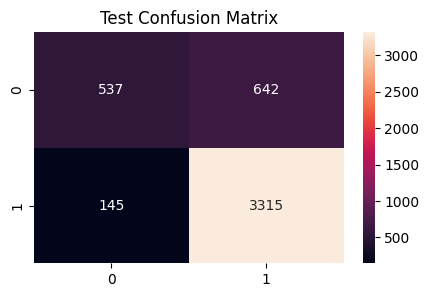

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Train the Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train_news_tfidf, y_train)

# Make predictions on the validation set
y_pred = clf.predict(X_val_news_tfidf)

# Calculate and print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)


print('Random Forest Classifier')
print('Accuracy:',accuracy)
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1)


Random Forest Classifier
Accuracy: 0.8221599482647122
Precision: 0.8464370234025769
Recall: 0.9303468208092486
F1 score: 0.8864105741429162


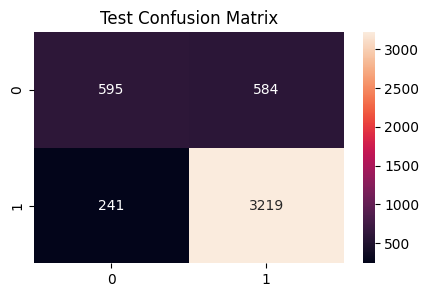

In [68]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X_train_news_tfidf, y_train, X_val_news_tfidf, y_val are defined

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train_news_tfidf, y_train)

# Make predictions on the validation set
y_pred = logreg.predict(X_val_news_tfidf)

# Calculate and print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print('Logistic Regression Classifier')
print('Accuracy:',accuracy)
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1)

Logistic Regression Classifier
Accuracy: 0.8353093339081699
Precision: 0.8456410256410256
Recall: 0.9531791907514451
F1 score: 0.8961956521739131


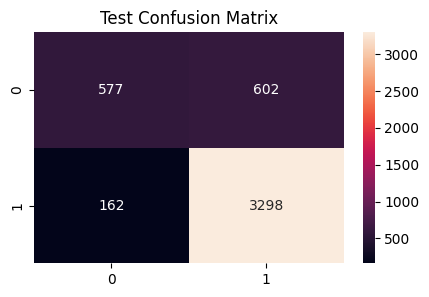

In [70]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()